In [124]:
import pandas as pd

cv_df = pd.read_parquet('./data/clean/cv.parquet')
vacancies_df = pd.read_parquet('./data/clean/vacancies.parquet')

cv_df.head()
vacancies_df.head()

,id,stateRegionCode,vacancyName,codeProfession,codeProfessionalSphere,professionalSphereName,vacancyAddress,vacancyAddressHouse,vacancyAddressAdditionalInfo,geo,salary,socialProtecteds,languageKnowledge,busyType,educationRequirements,hardSkills,softSkills,skills,typicalPosition,experienceRequirements,scheduleType,premium,otherVacancyBenefit,careerPerspective,codeExternalSystem,idPriorityCategory,needMedcard,sourceType,requiredСertificates,requiredDriveLicense,retrainingCapability,retrainingСondition,retrainingGrantValue,transportCompensation,changeTime,contactPerson,contactSource,company,fullCompanyName,oknpoCode,oksoCode,companyBusinessSize,dateModify,workPlaces,isUzbekistanRecruitment,federalDistrictCode,industryBranchName,datePublished,accommodationCapability,accommodationType,foreignWorkersCapability,metroIds,isQuoted,creationDate,isMobilityProgram,isModerated,deleted,visibility,regionName,status,vacancyUrl,positionRequirements,contactList,additionalRequirements,salaryMin,salaryMax,qualifications,responsibilities,addressCode,addressOffice,hireDate,workPlace,medicalCertificate,scheduleTypeComment,benefitDetails,trainingDays,shift,medicalDocument,benefit,conditions
9,1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2,7700000000000,Продавец-кассир,None,Sales,"Продажи, закупки, снабжение, торговля","Город Москва, 1-й Грайвороновский проезд",None,"Россия, г Москва, 1-й Грайвороновский проезд, ...","{""latitude"": 55.720874, ""longitude"": 37.725595}",от 58905,None,[],None,"{""educationType"": ""Не указано""}",[],[],[],None,0,Полный рабочий день,{},None,False,trudvsemintegration@rabota.ru,None,Не указано,Вакансия интернет ресурса,NaN,[],None,NaN,None,None,2025-03-05T14:00:54+0300,Подбор персонала Пятёрочка,None,"{""companyCode"": ""5147746474134"", ""url"": ""https...","ООО ""Агроторг""",NaN,None,SMALL,2025-03-05T14:00:54+0300,1,False,1,NaN,2025-03-05T14:00:54+0300,False,None,False,None,False,2025-03-05T14:00:54+0300,None,True,False,Видно всем,Город Москва,Одобрено,https://trudvsem.ru/vacancy/card/5147746474134...,None,"[{""contactType"": ""Телефон"", ""contactValue"": ""+...",None,58905,75735,None,«Пятерочка» приглашает на вакансию: Продавец-к...,77000000000026600,None,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,None
21,464a0d88-c5b7-11ef-96bd-29eee561bb17,7700000000000,Главный специалист направления PDM систем,209204,InformationTechnology,"Информационные технологии, телекоммуникации, с...","Город Москва, Озерковская набережная, 30",30,ООО АЛРОСА Информационные технологии,"{""latitude"": 55.738019, ""longitude"": 37.638}",от 52470,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],Ничего не выбрано,2,Полный рабочий день,{},None,False,None,None,Не указано,Работодатель,NaN,[],None,NaN,None,None,2025-03-05T14:46:28+0300,Контактный центр ОЦО,None,"{""companyCode"": ""1195476078258"", ""url"": ""https...","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЛРО...",NaN,None,SMALL,2025-03-05T15:40:02+0300,1,False,1,NaN,2025-03-05T15:40:02+0300,False,None,False,None,False,2024-12-29T10:34:02+0300,None,True,False,Видно всем,Город Москва,Одобрено,https://trudvsem.ru/vacancy/card/1195476078258...,Высшее техническое образование. Опыт работы с ...,"[{""contactType"": ""Телефон"", ""contactValue"": ""8...",None,52470,52470,Высшее техническое образование. Опыт работы с ...,- выполнение запросов на изменение ИС; - выпол...,77000000000210800,None,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
25,23e60dd5-b130-11ee-9b60-cb26dff57dd7,7700000000000,Экономист,277409,AccountingTaxesManagement,"Бухгалтерия, налоги, управленческий учет","Город Москва, Хромова улица, дом 24",дом 24,None,"{""latitude"": 55.799973, ""longitude"": 37.719998}",от 40000,None,[],Полная занятость,"{""educationType"": ""Высшее-бакалавриат"", ""educa...",[],[],[],None,3,Полный рабочий день,"{""premiumSize"": 25, ""premiumType"": ""MONTHLY""}",None,False,None,None,Н

# Гистограммы и диаграммы рассеяния

In [125]:
def find_name(code, json_data):
    for item in json_data:
        try:
            if item['code'] == code:
                    if (item['type'] in ['int', 'bool', 'boolean']):
                        return item['name'], item['type']
        except:
            return False
    return False


100%|██████████| 80/80 [00:03<00:00, 23.30it/s]


Rendering 18


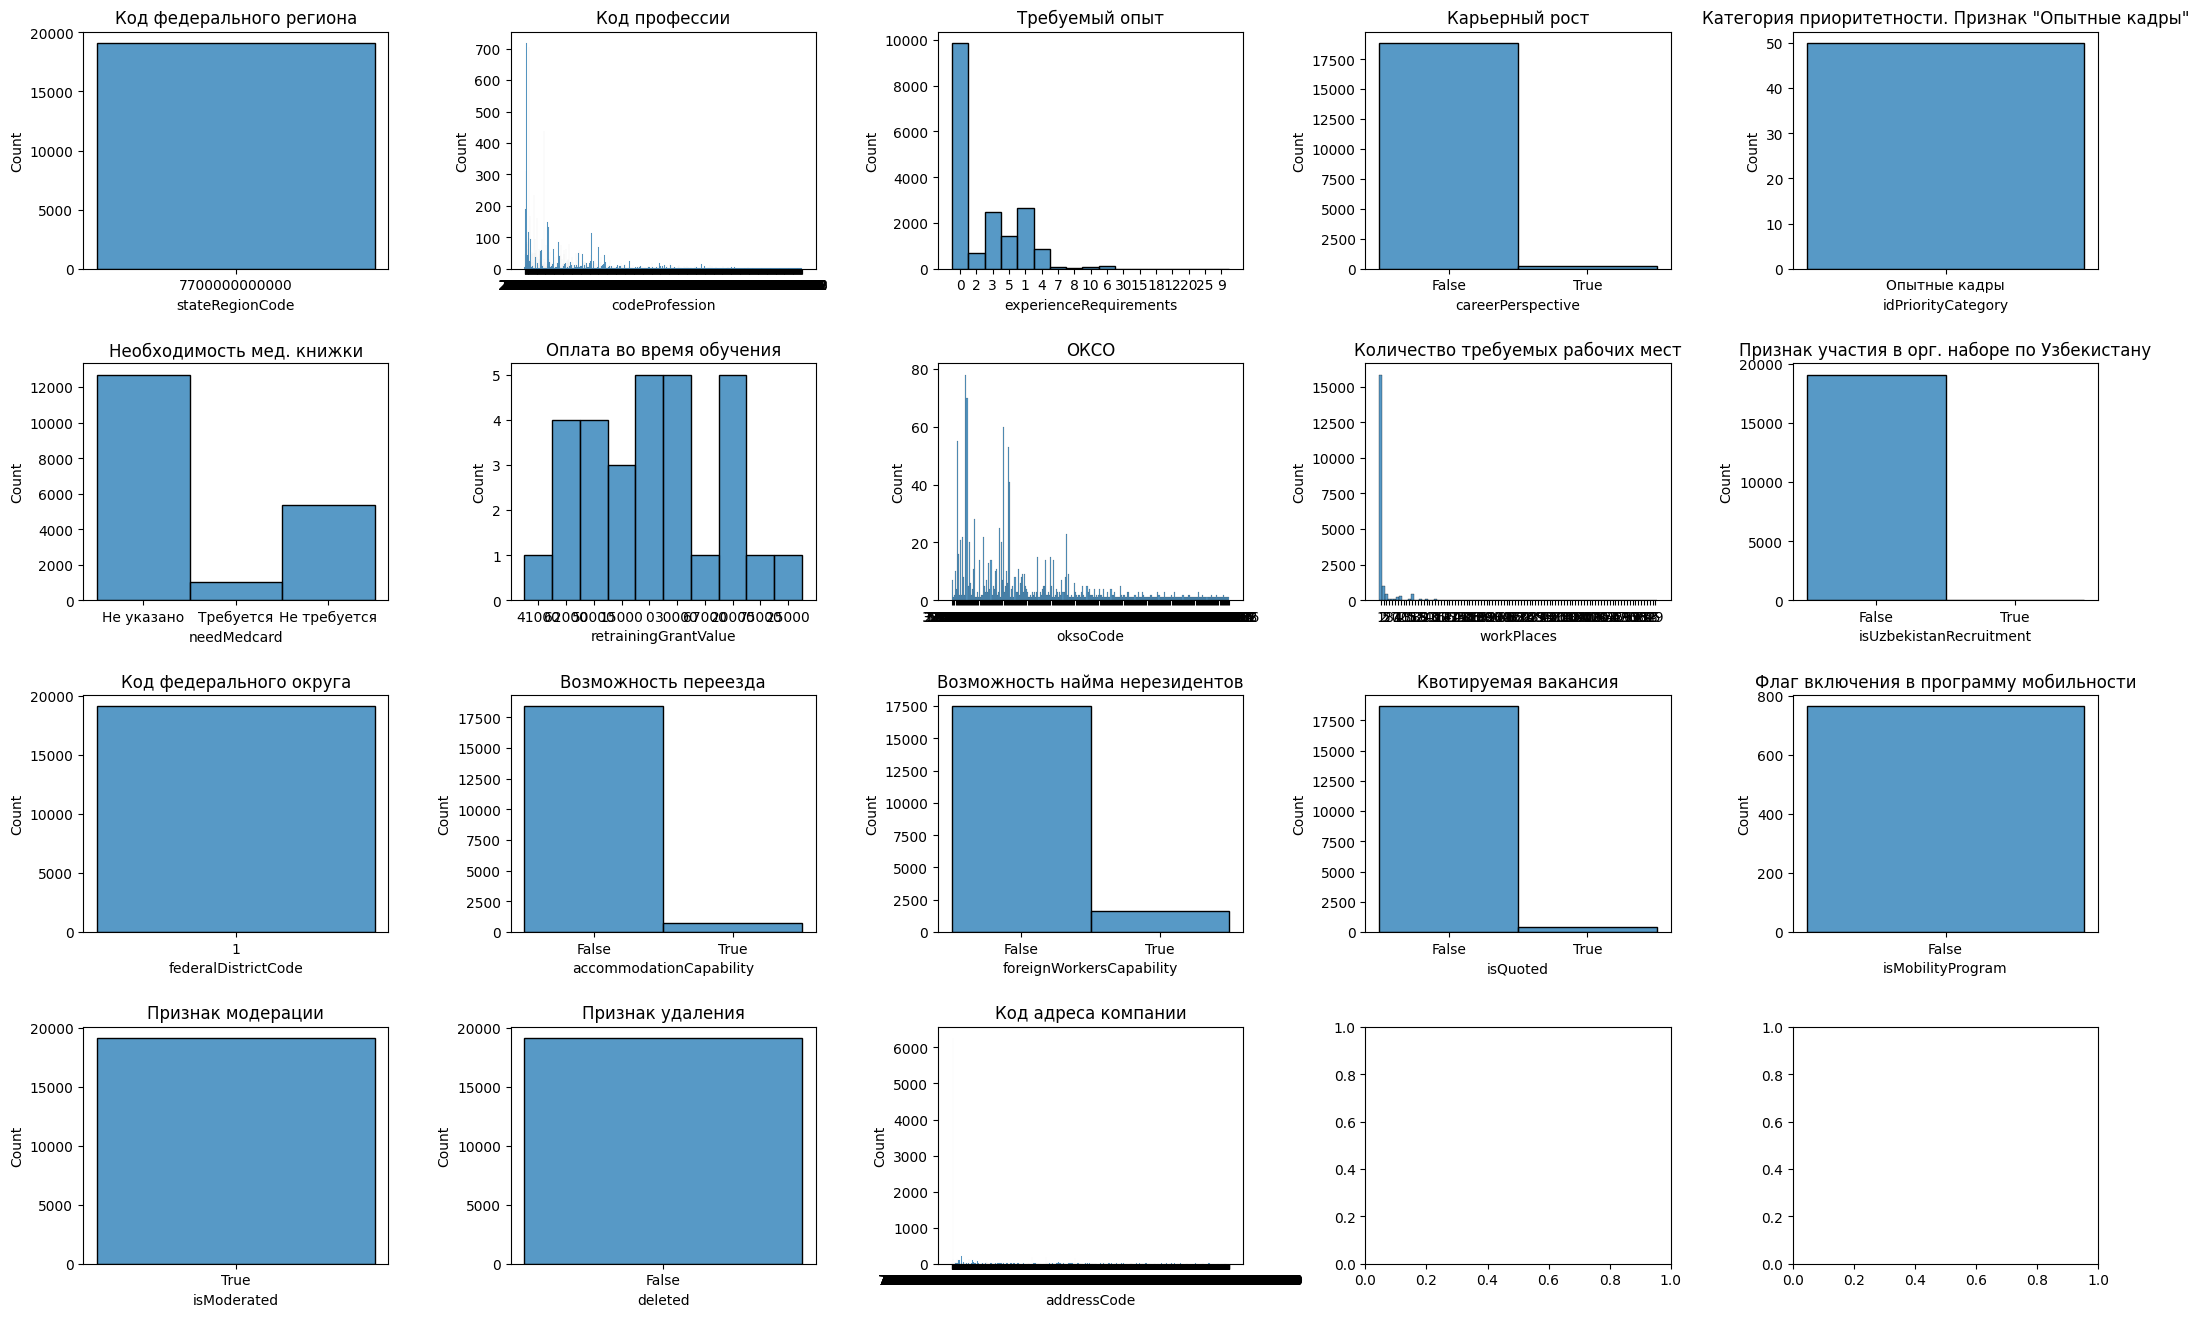

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm

fig, axs = plt.subplots(4, 5, figsize=(26,16))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

with open('./data/vacancies_attributes.json', 'r') as f:
    attr_data = json.load(f)

    i = 0
    for attr in tqdm(list(vacancies_df.columns)):
        if (not find_name(attr, attr_data)):
            continue

        attr_name, attr_type = find_name(attr, attr_data)
        sns.histplot(vacancies_df[attr], ax=axs[i // 5][i % 5])
        axs[i // 5][i % 5].set_title(attr_name)
        i += 1

print('Rendering', i)

Убираем колонки, в которых все значения одинаковые

In [127]:
clean_vacancies_df = vacancies_df.drop(['stateRegionCode', 'federalDistrictCode', 'isModerated', 'deleted'], axis=1)

In [128]:
clean_vacancies_df.columns

Index(['id', 'vacancyName', 'codeProfession', 'codeProfessionalSphere',
       'professionalSphereName', 'vacancyAddress', 'vacancyAddressHouse',
       'vacancyAddressAdditionalInfo', 'geo', 'salary', 'socialProtecteds',
       'languageKnowledge', 'busyType', 'educationRequirements', 'hardSkills',
       'softSkills', 'skills', 'typicalPosition', 'experienceRequirements',
       'scheduleType', 'premium', 'otherVacancyBenefit', 'careerPerspective',
       'codeExternalSystem', 'idPriorityCategory', 'needMedcard', 'sourceType',
       'requiredСertificates', 'requiredDriveLicense', 'retrainingCapability',
       'retrainingСondition', 'retrainingGrantValue', 'transportCompensation',
       'changeTime', 'contactPerson', 'contactSource', 'company',
       'fullCompanyName', 'oknpoCode', 'oksoCode', 'companyBusinessSize',
       'dateModify', 'workPlaces', 'isUzbekistanRecruitment',
       'industryBranchName', 'datePublished', 'accommodationCapability',
       'accommodationType', 'for

Убираем колонки не имеющие влияния на выборку в целом

In [129]:
clean_vacancies_df = clean_vacancies_df.drop(['sourceType', 'changeTime', 'dateModify', 'creationDate', 'regionName', 'status', 'geo', 'vacancyUrl', 'visibility', 'addressCode', 'contactList'], axis=1)

In [130]:
clean_vacancies_df = clean_vacancies_df.drop(['vacancyName', 'professionalSphereName', 'vacancyAddress', 'vacancyAddressHouse', 'vacancyAddressAdditionalInfo', 'contactPerson', 'contactSource', 'company', 'fullCompanyName', 'oknpoCode', 'oksoCode', 'addressOffice'], axis=1)

In [131]:
pd.set_option('display.max_columns', None)
clean_vacancies_df.head()

,id,codeProfession,codeProfessionalSphere,salary,socialProtecteds,languageKnowledge,busyType,educationRequirements,hardSkills,softSkills,skills,typicalPosition,experienceRequirements,scheduleType,premium,otherVacancyBenefit,careerPerspective,codeExternalSystem,idPriorityCategory,needMedcard,requiredСertificates,requiredDriveLicense,retrainingCapability,retrainingСondition,retrainingGrantValue,transportCompensation,companyBusinessSize,workPlaces,isUzbekistanRecruitment,industryBranchName,datePublished,accommodationCapability,accommodationType,foreignWorkersCapability,metroIds,isQuoted,isMobilityProgram,positionRequirements,additionalRequirements,salaryMin,salaryMax,qualifications,responsibilities,hireDate,workPlace,medicalCertificate,scheduleTypeComment,benefitDetails,trainingDays,shift,medicalDocument,benefit,conditions
9,1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2,None,Sales,от 58905,None,[],None,"{""educationType"": ""Не указано""}",[],[],[],None,0,Полный рабочий день,{},None,False,trudvsemintegration@rabota.ru,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T14:00:54+0300,False,None,False,None,False,None,None,None,58905,75735,None,«Пятерочка» приглашает на вакансию: Продавец-к...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,None
21,464a0d88-c5b7-11ef-96bd-29eee561bb17,209204,InformationTechnology,от 52470,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],Ничего не выбрано,2,Полный рабочий день,{},None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T15:40:02+0300,False,None,False,None,False,None,Высшее техническое образование. Опыт работы с ...,None,52470,52470,Высшее техническое образование. Опыт работы с ...,- выполнение запросов на изменение ИС; - выпол...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
25,23e60dd5-b130-11ee-9b60-cb26dff57dd7,277409,AccountingTaxesManagement,от 40000,None,[],Полная занятость,"{""educationType"": ""Высшее-бакалавриат"", ""educa...",[],[],[],None,3,Полный рабочий день,"{""premiumSize"": 25, ""premiumType"": ""MONTHLY""}",None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T16:48:57+0300,False,None,False,None,False,None,Внутренние организационно-распорядительные док...,None,40000,45000,Внутренние организационно-распорядительные док...,"Создание бухгалтерской и налоговой отчетности,...",None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Оптимальные
33,1f58a7f8-ddf3-11ef-9bbd-d549be31d974,208894,InformationTechnology,от 52470,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],Ничего не выбрано,3,Полный рабочий день,{},None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T14:41:17+0300,False,None,False,None,False,None,"Высшее образование, опыт работы не менее 3 лет5",None,52470,52470,"Высшее образование, опыт работы не менее 3 лет5",- оценка и приоритезация ЗНИ (запросов на изме...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
40,4bc2c13a-f7e9-11ef-9741-e7d0d2cf29b1,204484,Medicine,от 96000,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],"[""Подбор очков"", ""Подбор линз""]",Врач-офтальмолог,0,Полный рабочий день,{},None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,2,False,NaN,2025-03-05T10:34:11+0300,False,None,False,None,False,None,Работа на авторефрактометре. Умение подбирать ...,None,96000,155000,Работа на авторефрактометре. Умение подбирать ...,Профилактический осмотр пациентов (взрослых) н...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые


In [132]:
clean_vacancies_df.set_index('id', inplace=True)

In [133]:
clean_vacancies_df.nunique()

codeProfession                864
codeProfessionalSphere         35
salary                       1087
socialProtecteds               44
languageKnowledge             755
busyType                        6
educationRequirements         742
hardSkills                    428
softSkills                     84
skills                       1277
typicalPosition               536
experienceRequirements         17
scheduleType                    6
premium                       118
otherVacancyBenefit           577
careerPerspective               2
codeExternalSystem              4
idPriorityCategory              1
needMedcard                     3
requiredСertificates            0
requiredDriveLicense           32
retrainingCapability            2
retrainingСondition             0
retrainingGrantValue           10
transportCompensation           3
companyBusinessSize             5
workPlaces                     97
isUzbekistanRecruitment         2
industryBranchName              0
datePublished 

Убираем полностью незаполненные колонки

In [134]:
clean_vacancies_df = clean_vacancies_df.drop(['requiredСertificates', 'retrainingСondition', 'industryBranchName', 'benefitDetails'], axis=1)

In [135]:
clean_vacancies_df = clean_vacancies_df.drop(['salary', 'codeExternalSystem'], axis=1)

In [136]:
clean_vacancies_df.codeProfession = pd.to_numeric(clean_vacancies_df.codeProfession)
clean_vacancies_df.workPlaces = pd.to_numeric(clean_vacancies_df.workPlaces)
clean_vacancies_df.experienceRequirements = pd.to_numeric(clean_vacancies_df.experienceRequirements)
clean_vacancies_df.accommodationCapability = clean_vacancies_df.accommodationCapability.astype('bool')
clean_vacancies_df.careerPerspective = clean_vacancies_df.careerPerspective.astype('bool')
clean_vacancies_df.isUzbekistanRecruitment = clean_vacancies_df.isUzbekistanRecruitment.astype('bool')
clean_vacancies_df.foreignWorkersCapability = clean_vacancies_df.foreignWorkersCapability.astype('bool')
clean_vacancies_df.isQuoted = clean_vacancies_df.isQuoted.astype('bool')
clean_vacancies_df.salaryMin = pd.to_numeric(clean_vacancies_df.salaryMin)
clean_vacancies_df.salaryMax = pd.to_numeric(clean_vacancies_df.salaryMax)
clean_vacancies_df.trainingDays = pd.to_numeric(clean_vacancies_df.trainingDays)
clean_vacancies_df.datePublished = pd.to_datetime(clean_vacancies_df.datePublished)
clean_vacancies_df.hireDate = pd.to_datetime(clean_vacancies_df.hireDate)
clean_vacancies_df.codeProfessionalSphere = clean_vacancies_df.codeProfessionalSphere.astype('string')
clean_vacancies_df.busyType = clean_vacancies_df.busyType.astype('string')
clean_vacancies_df.typicalPosition = clean_vacancies_df.typicalPosition.astype('string')
clean_vacancies_df.scheduleType = clean_vacancies_df.scheduleType.astype('string')
clean_vacancies_df.retrainingCapability = clean_vacancies_df.retrainingCapability.astype('bool')
clean_vacancies_df.retrainingGrantValue = pd.to_numeric(clean_vacancies_df.retrainingGrantValue)
clean_vacancies_df.isUzbekistanRecruitment = clean_vacancies_df.isUzbekistanRecruitment.astype('bool')
clean_vacancies_df.isMobilityProgram = clean_vacancies_df.isMobilityProgram.astype('bool')
clean_vacancies_df.qualifications = clean_vacancies_df.qualifications.astype('string')
clean_vacancies_df.responsibilities = clean_vacancies_df.responsibilities.astype('string')
clean_vacancies_df.conditions = clean_vacancies_df.conditions.astype('string')


In [137]:
clean_vacancies_df.idPriorityCategory = clean_vacancies_df.idPriorityCategory.astype('bool')

In [138]:
clean_vacancies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19106 entries, 1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2 to fdd97dc8-009d-11f0-bdbc-cb26dff57dd7
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype                    
---  ------                    --------------  -----                    
 0   codeProfession            9286 non-null   float64                  
 1   codeProfessionalSphere    19106 non-null  string                   
 2   socialProtecteds          1162 non-null   object                   
 3   languageKnowledge         19106 non-null  object                   
 4   busyType                  10193 non-null  string                   
 5   educationRequirements     19106 non-null  object                   
 6   hardSkills                19106 non-null  object                   
 7   softSkills                19106 non-null  object                   
 8   skills                    19106 non-null  object                   
 9   typicalPosition       

In [139]:
clean_vacancies_df.describe()

,codeProfession,experienceRequirements,retrainingGrantValue,workPlaces,salaryMin,salaryMax,trainingDays
count,9286.000000,18274.000000,30.000000,19106.000000,18218.000000,15510.000000,19106.000000
mean,214478.684148,1.332932,31700.000000,3.302889,64153.304260,81724.699678,0.064639
std,53404.010877,1.893435,22609.351132,21.828393,42436.063756,54170.889289,1.901268
min,100054.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,181130.750000,0.000000,16250.000000,1.000000,35000.000000,55000.000000,0.000000
50%,224469.000000,0.000000,30000.000000,1.000000,59000.000000,75735.000000,0.000000
75%,246805.000000,3.000000,50000.000000,1.000000,80000.000000,100000.000000,0.000000
max,471226.000000,30.000000,75000.000000,1300.000000,800000.000000,1000000.000000,165.000000


In [140]:
clean_vacancies_df.nunique()

codeProfession                864
codeProfessionalSphere         35
socialProtecteds               44
languageKnowledge             755
busyType                        6
educationRequirements         742
hardSkills                    428
softSkills                     84
skills                       1277
typicalPosition               536
experienceRequirements         17
scheduleType                    6
premium                       118
otherVacancyBenefit           577
careerPerspective               1
idPriorityCategory              2
needMedcard                     3
requiredDriveLicense           32
retrainingCapability            2
retrainingGrantValue           10
transportCompensation           3
companyBusinessSize             5
workPlaces                     97
isUzbekistanRecruitment         1
datePublished               14185
accommodationCapability         1
accommodationType               4
foreignWorkersCapability        1
metroIds                      653
isQuoted      

In [141]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336865 entries, 5 to 10376736
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           336865 non-null  object 
 1   candidateId                  336865 non-null  object 
 2   stateRegionCode              336865 non-null  object 
 3   locality                     336865 non-null  object 
 4   localityName                 336859 non-null  object 
 5   birthday                     324873 non-null  object 
 6   gender                       336865 non-null  object 
 7   age                          324873 non-null  object 
 8   positionName                 336849 non-null  object 
 9   dateCreate                   336863 non-null  object 
 10  typicalPosition              15092 non-null   object 
 11  dateModify                   336865 non-null  object 
 12  publishedDate                335281 non-null  object 
 13  ac

In [142]:
clean_cv_df = cv_df.set_index('candidateId')

In [143]:
clean_cv_df.head()

,id,stateRegionCode,locality,localityName,birthday,gender,age,positionName,dateCreate,typicalPosition,dateModify,publishedDate,academicDegree,skills,worldskills,worldskillsInspectionStatus,abilympicsInspectionStatus,abilympicsParticipation,volunteersInspectionStatus,volunteersParticipation,driveLicenses,experience,professionsList,otherCertificates,narkCertificate,narkInspectionStatus,codeExternalSystem,country,educationList,additionalEducationList,hardSkills,softSkills,workExperienceList,scheduleType,salary,busyType,retrainingCapability,businessTrip,languageKnowledge,relocation,innerInfo,salaryMin,salaryMax,shifts,businessActivities,certifyingDocuments,additionalInformation,education
candidateId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f8fbc170-a190-11e6-841a-ef76bd2a03c1,1989bab6-b0b3-11e6-9d39-ef76bd2a03c1,7700000000000,7700000000000,г-Москва,1989-05-26T00:00:00+0400,Женский,35,"Архивариус,-делопроизводитель.",2016-11-22T15:56:35+0300,None,2016-11-23T15:15:59+0300,2016-11-22T17:10:01+0300,NaN,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0,None,None,None,Получение-свидетельства-о-независимой-оценке-к...,None,"[{""countryName"": ""Российская Федерация"", ""coun...","[{""faculty"": ""Юридический"", ""graduateYear"": 20...",[],[],[],"[{""companyName"": ""\""Люберецкий медицинский кол...",Полный-рабочий-день,40000,None,Готов-к-переобучению,Не-готов-к-командировкам,[],Не-готов-к-переезду,"{""idUser"": ""b84a3000-4e87-11e6-a9d7-5d9e90ab95...",40000,40000,[],[],[],None,Среднее-общее
27700f90-7643-11e5-8f00-833b590698f7,1989a75a-7649-11e5-8f00-833b590698f7,7700000000000,7700000000000,г-Москва,1992-08-02T00:00:00+0400,Женский,32,инженер,2018-02-21T13:16:08+0300,None,2016-02-29T18:21:43+0300,2015-10-20T09:47:57+0300,NaN,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0,None,Диплом-2-степени-в-ХVII-Аспирантско-магистерск...,None,Получение-свидетельства-о-независимой-оценке-к...,None,"[{""countryName"": ""Российская Федерация"", ""coun...","[{""faculty"": ""ИЭЭ"", ""graduateYear"": 2013, ""ins...",[],[],[],[],Полный-рабочий-день,30000,None,Готов-к-переобучению,Не-готов-к-командировкам,"[{""codeLanguage"": ""Английский"", ""level"": ""B2 —...",Не-готов-к-переезду,"{""idUser"": ""812425c0-ce55-11e5-bc82-13f1c2fc2b...",30000,30000,[],[],[],None,Высшее-бакалавриат
eb785b50-9dbe-11e7-9620-4376a32b3f45,19899e90-9dcf-11e7-9620-4376a32b3f45,7700000000000,7700000000000,г-Москва,1976-09-29T00:00:00+0300,Мужской,48,Сотрудник-в-офис,2017-09-20T09:44:07+0300,None,2017-09-20T09:44:07+0300,2017-09-20T09:56:06+0300,NaN,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""","[""B""]",1,None,"Школа-охраны-""Скиф""-город-Москва",None,Получение-свидетельства-о-независимой-оценке-к...,None,"[{""countryName"": ""Российская Федерация"", ""coun...","[{""graduateYear"": 1994, ""instituteName"": ""ПТУ ...","[{""graduateYear"": 1999, ""organization"": ""Влади...",[],[],"[{""companyName"": ""АКБ РосЕроБанк"", ""dateFrom"":...",Полный-рабочий-день,35000,None,Готов-к-переобучению,Готов-к-командировкам,"[{""codeLanguage"": ""Английский"", ""level"": ""A1 —...",Не-готов-к-переезду,"{""idUser"": ""1517a090-5ecf-11e6-8b5c-5d9e90ab95...",35000,35000,[],[],[],None,Среднее-общее
7426f9a0-9d06-11ee-b6d2-e73e8fa159bf,198957b0-c662-11ee-a0b8-716c765c9fe3,7700000000000,7700000000000,г-Москва,2002-08-28T00:00:00+0400,Мужской,22,Младший-инженер-разработчик,2024-02-08T12:11:53+0300,None,2024-02-08T12:11:53+030

In [144]:
clean_cv_df = clean_cv_df.drop(['id', 'stateRegionCode', 'locality', 'localityName', 'dateModify', 'dateCreate', 'codeExternalSystem', 'country', 'educationList', 'workExperienceList', 'innerInfo', 'salary'], axis=1)

In [145]:
clean_cv_df.nunique()

birthday                        38532
gender                              2
age                               113
positionName                    72751
typicalPosition                   707
publishedDate                  334694
academicDegree                      0
skills                           8025
worldskills                       674
worldskillsInspectionStatus         2
abilympicsInspectionStatus          2
abilympicsParticipation             3
volunteersInspectionStatus          3
volunteersParticipation             2
driveLicenses                      90
experience                         93
professionsList                     1
otherCertificates               18559
narkCertificate                     4
narkInspectionStatus                6
additionalEducationList         48291
hardSkills                      31580
softSkills                      11093
scheduleType                       10
busyType                            2
retrainingCapability                6
businessTrip

In [146]:
clean_cv_df = clean_cv_df.drop(['academicDegree'], axis=1)

In [147]:
clean_cv_df.head()

,birthday,gender,age,positionName,typicalPosition,publishedDate,skills,worldskills,worldskillsInspectionStatus,abilympicsInspectionStatus,abilympicsParticipation,volunteersInspectionStatus,volunteersParticipation,driveLicenses,experience,professionsList,otherCertificates,narkCertificate,narkInspectionStatus,additionalEducationList,hardSkills,softSkills,scheduleType,busyType,retrainingCapability,businessTrip,languageKnowledge,relocation,salaryMin,salaryMax,shifts,businessActivities,certifyingDocuments,additionalInformation,education
candidateId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f8fbc170-a190-11e6-841a-ef76bd2a03c1,1989-05-26T00:00:00+0400,Женский,35,"Архивариус,-делопроизводитель.",None,2016-11-22T17:10:01+0300,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0,None,None,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Полный-рабочий-день,None,Готов-к-переобучению,Не-готов-к-командировкам,[],Не-готов-к-переезду,40000,40000,[],[],[],None,Среднее-общее
27700f90-7643-11e5-8f00-833b590698f7,1992-08-02T00:00:00+0400,Женский,32,инженер,None,2015-10-20T09:47:57+0300,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0,None,Диплом-2-степени-в-ХVII-Аспирантско-магистерск...,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Полный-рабочий-день,None,Готов-к-переобучению,Не-готов-к-командировкам,"[{""codeLanguage"": ""Английский"", ""level"": ""B2 —...",Не-готов-к-переезду,30000,30000,[],[],[],None,Высшее-бакалавриат
eb785b50-9dbe-11e7-9620-4376a32b3f45,1976-09-29T00:00:00+0300,Мужской,48,Сотрудник-в-офис,None,2017-09-20T09:56:06+0300,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""","[""B""]",1,None,"Школа-охраны-""Скиф""-город-Москва",None,Получение-свидетельства-о-независимой-оценке-к...,"[{""graduateYear"": 1999, ""organization"": ""Влади...",[],[],Полный-рабочий-день,None,Готов-к-переобучению,Готов-к-командировкам,"[{""codeLanguage"": ""Английский"", ""level"": ""A1 —...",Не-готов-к-переезду,35000,35000,[],[],[],None,Среднее-общее
7426f9a0-9d06-11ee-b6d2-e73e8fa159bf,2002-08-28T00:00:00+0400,Мужской,22,Младший-инженер-разработчик,None,2024-02-08T12:25:36+0300,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0,None,None,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Полный-рабочий-день,None,Готов-к-переобучению,Готов-к-командировкам,[],Не-готов-к-переезду,30000,30000,[],[],[],None,None
c672ef90-74c3-11ee-804e-e73e8fa159bf,1987-07-17T16:00:00+0400,Женский,37,Сменный-мастер,None,2023-10-30T08:05:32+0300,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""","[""B""]",11,None,None,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Сменная-работа,None,Готов-к-переобучению,Не-готов-к-командировкам,"[{""codeLanguage"": ""Русский"", ""level"": ""A1 — на...",Не-готов-к-переезду,55000,55000,[],[],[],None,Высшее-бакалавриат


In [148]:
clean_cv_df.birthday = pd.to_datetime(clean_cv_df.birthday, errors='coerce', utc=True)
clean_cv_df.gender = clean_cv_df.gender.astype('string')
clean_cv_df.birthday = pd.to_datetime(clean_cv_df.birthday)
clean_cv_df.age = pd.to_numeric(clean_cv_df.age, errors='coerce')
clean_cv_df.positionName = clean_cv_df.positionName.astype('string')
clean_cv_df.publishedDate = pd.to_datetime(clean_cv_df.publishedDate)
clean_cv_df.experience = pd.to_numeric(clean_cv_df.experience, errors='coerce')
clean_cv_df.otherCertificates = clean_cv_df.otherCertificates.astype('string')
clean_cv_df.scheduleType = clean_cv_df.scheduleType.astype('string')
clean_cv_df.salaryMin = pd.to_numeric(clean_cv_df.salaryMin, errors='coerce')
clean_cv_df.salaryMax = pd.to_numeric(clean_cv_df.salaryMax, errors='coerce')
clean_cv_df.education = clean_cv_df.education.astype('string')

In [149]:
clean_cv_df.head()

,birthday,gender,age,positionName,typicalPosition,publishedDate,skills,worldskills,worldskillsInspectionStatus,abilympicsInspectionStatus,abilympicsParticipation,volunteersInspectionStatus,volunteersParticipation,driveLicenses,experience,professionsList,otherCertificates,narkCertificate,narkInspectionStatus,additionalEducationList,hardSkills,softSkills,scheduleType,busyType,retrainingCapability,businessTrip,languageKnowledge,relocation,salaryMin,salaryMax,shifts,businessActivities,certifyingDocuments,additionalInformation,education
candidateId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f8fbc170-a190-11e6-841a-ef76bd2a03c1,1989-05-25 20:00:00+00:00,Женский,35.0,"Архивариус,-делопроизводитель.",None,2016-11-22 17:10:01+03:00,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0.0,None,<NA>,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Полный-рабочий-день,None,Готов-к-переобучению,Не-готов-к-командировкам,[],Не-готов-к-переезду,40000.0,40000.0,[],[],[],None,Среднее-общее
27700f90-7643-11e5-8f00-833b590698f7,1992-08-01 20:00:00+00:00,Женский,32.0,инженер,None,2015-10-20 09:47:57+03:00,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0.0,None,Диплом-2-степени-в-ХVII-Аспирантско-магистерск...,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Полный-рабочий-день,None,Готов-к-переобучению,Не-готов-к-командировкам,"[{""codeLanguage"": ""Английский"", ""level"": ""B2 —...",Не-готов-к-переезду,30000.0,30000.0,[],[],[],None,Высшее-бакалавриат
eb785b50-9dbe-11e7-9620-4376a32b3f45,1976-09-28 21:00:00+00:00,Мужской,48.0,Сотрудник-в-офис,None,2017-09-20 09:56:06+03:00,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""","[""B""]",1.0,None,"Школа-охраны-""Скиф""-город-Москва",None,Получение-свидетельства-о-независимой-оценке-к...,"[{""graduateYear"": 1999, ""organization"": ""Влади...",[],[],Полный-рабочий-день,None,Готов-к-переобучению,Готов-к-командировкам,"[{""codeLanguage"": ""Английский"", ""level"": ""A1 —...",Не-готов-к-переезду,35000.0,35000.0,[],[],[],None,Среднее-общее
7426f9a0-9d06-11ee-b6d2-e73e8fa159bf,2002-08-27 20:00:00+00:00,Мужской,22.0,Младший-инженер-разработчик,None,2024-02-08 12:25:36+03:00,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""",[],0.0,None,<NA>,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Полный-рабочий-день,None,Готов-к-переобучению,Готов-к-командировкам,[],Не-готов-к-переезду,30000.0,30000.0,[],[],[],None,<NA>
c672ef90-74c3-11ee-804e-e73e8fa159bf,1987-07-17 12:00:00+00:00,Женский,37.0,Сменный-мастер,None,2023-10-30 08:05:32+03:00,[],[],Участие-в-чемпионате-Worldskills-не-подтверждено,Участие-в-движении-Абилимпикс-не-подтверждено,Не-принимал-участие-в-движении-Абилимпикс,"Участие-в-движении-""DOBRO.RU""-не-подтверждено","Не-принимал-участие-в-движении-""DOBRO.RU""","[""B""]",11.0,None,<NA>,None,Получение-свидетельства-о-независимой-оценке-к...,[],[],[],Сменная-работа,None,Готов-к-переобучению,Не-готов-к-командировкам,"[{""codeLanguage"": ""Русский"", ""level"": ""A1 — на...",Не-готов-к-переезду,55000.0,55000.0,[],[],[],None,Высшее-бакалавриат


In [150]:
clean_cv_df.worldskillsInspectionStatus = clean_cv_df.worldskillsInspectionStatus.map({'Участие-в-чемпионате-Worldskills-не-подтверждено': False, 'Участие-в-чемпионате-Worldskills-подтверждено': True})
clean_cv_df.worldskillsInspectionStatus = clean_cv_df.worldskillsInspectionStatus.astype('bool')

In [151]:
clean_cv_df.abilympicsInspectionStatus = clean_cv_df.abilympicsInspectionStatus.map({'Участие-в-движении-Абилимпикс-не-подтверждено': False, '[{"countryName": "Российская Федерация", "countryCode": "RU"}]': True})
clean_cv_df.abilympicsInspectionStatus = clean_cv_df.abilympicsInspectionStatus.astype('bool')

In [152]:
clean_cv_df.abilympicsParticipation = clean_cv_df.abilympicsParticipation.map({'Не-принимал-участие-в-движении-Абилимпикс': False, 'Принимал-участие-в-движении-Абилимпикс': True, '[{"graduateYear": 2015, "instituteName": "«Образовательный комплекс «Юго-Запад»", "type": "Education"}]': True})
clean_cv_df.abilympicsParticipation = clean_cv_df.abilympicsParticipation.astype('bool')

In [153]:
clean_cv_df.volunteersInspectionStatus = clean_cv_df.volunteersInspectionStatus.map({'Участие-в-движении-"DOBRO.RU"-не-подтверждено': False, 'Участие-в-движении-"DOBRO.RU"-подтверждено': True, '[]': False})
clean_cv_df.volunteersInspectionStatus = clean_cv_df.volunteersInspectionStatus.astype('bool')

In [154]:
clean_cv_df.volunteersParticipation = clean_cv_df.volunteersParticipation.map({'Не-принимал-участие-в-движении-"DOBRO.RU': False, '["3d моделирование"]': True})
clean_cv_df.volunteersParticipation = clean_cv_df.volunteersParticipation.astype('bool')

In [155]:
clean_cv_df.narkCertificate = clean_cv_df.narkCertificate.apply(lambda x: x == 'Свидетельство-о-независимой-оценке-квалификации')
clean_cv_df.narkCertificate = clean_cv_df.narkCertificate.astype('bool')


In [156]:
clean_cv_df.narkCertificate = clean_cv_df.narkInspectionStatus.apply(lambda x: x == 'Получение-свидетельства-о-независимой-оценке-квалификации-подтверждено')
clean_cv_df.narkCertificate = clean_cv_df.narkCertificate.astype('bool')


In [157]:
clean_cv_df.narkCertificate = clean_cv_df.scheduleType.apply(lambda x: None if pd.isna(x) else x if x in [
    'Полный-рабочий-день', 
    'Сменная-работа', 
    'Неполный-рабочий-день/неполная-рабочая-неделя', 
    'Вахтовый-метод',
    'Режим-гибкого-рабочего-времени',
    'Ненормированный-рабочий-день'
] else None)
clean_cv_df.scheduleType = clean_cv_df.scheduleType = clean_cv_df.scheduleType.astype('string')

Данные не относятся к колонке

In [158]:
clean_cv_df = clean_cv_df.drop(['busyType'], axis=1)

In [159]:
clean_cv_df = clean_cv_df.drop(['professionsList'], axis=1)

In [123]:
clean_cv_df.businessTrip = clean_cv_df.businessTrip.apply(lambda x: None if pd.isna(x) else x == 'Готов-к-командировкам')
clean_cv_df.businessTrip = clean_cv_df.businessTrip.astype('bool')

In [160]:
clean_cv_df.relocation = clean_cv_df.relocation.apply(lambda x: x == 'Готов-к-переезду')
clean_cv_df.relocation = clean_cv_df.relocation.astype('bool')

In [ ]:
clean_cv_df.shifts = clean_cv_df.shifts.apply(lambda x: None if pd.isna(x) else x if '[' in x and not '[]' in x else None)


array([None, '["По графику сменности"]', '["Только дневная смена"]',
       '["Только ночная смена"]',
       '["Только дневная смена", "По графику сменности"]',
       '["По графику сменности", "Только дневная смена"]',
       '["Только дневная смена", "По графику сменности", "Только ночная смена"]',
       '["Только ночная смена", "По графику сменности"]',
       '["По графику сменности", "Только ночная смена"]',
       '["По графику сменности", "Только ночная смена", "Только дневная смена"]'],
      dtype=object)

In [169]:
clean_cv_df.additionalInformation.unique()

array([None, 'проживание-метро-Крымская,-Академическая',
       'Целеустремленная,-добрая,-очень-люблю-детей.-Логопедический-массаж-(имею-сертификаты-с-2014-года)-Зондовый-массаж-Постановка-звуков-по-методике-В.-Н.-Костыгиной-Использование-в-работе-с-детьми-с-синдромом-Дауна-логопедических-распевок-Жуковой.-Работа-по-визуальному-расписанию-для-детей-с-аутизмом-и-детей-с-умственной-отсталостью.',
       'Интересна-работа-также-в-заготовочной-и-горячем-цехе.',
       'Ищу-гибридный-график-работы,-с-возможностью-частично-работать-удалённо.-Готова-на-любые-участки,-кроме-зарплаты-и-авансовых-отчетов.-Проживаю-м.-Черкизовская-Рекомендательные-письма-с-предыдущих-мест-работы-есть.',
       'У-меня-богатый-опыт-в-организации-и-координации-мероприятий.-Я-внимательно-отношусь-к-деталям-и-стремлюсь-к-максимальной-эффективности-командной-работы.-В-свободное-время-люблю-активный-отдых:-походы,-рыбалку-и-яхтинг.-Это-помогает-мне-сохранять-энергию-и-развивать-навыки-принятия-решений-в-сложных-услови